# Life Expectancy and GDP (Codecademy Project)

This particular project is among the compilation of portfolio assignments I accomplished during my engagement with Codecademy's Data Science career path. The focal point of this endeavor involves the utilization of data amassed by Codecademy from the World Health Organization and the World Bank. The objective is to delve into the intricate interconnections existing between Gross Domestic Product (GDP) and the life expectancy at birth within six distinct countries. By generating visual representations of life expectancy plotted against GDP for each of these six nations, I embark on a quest to ascertain the presence of a positive correlation between the two attributes. Subsequently, I explore the concept of fitting a trendline to the life expectancy vs. GDP data. An additional facet of this exploration involves a scrutiny of the average life expectancy across the six countries, coupled with an analysis of the changes in life expectancy over a span of 15 years. 

Here are the specific questions addressed by this project:
1. What is the average life expectancy in the six nations?
2. What does the life expectancy distribution of each nation look like?
3. Has life expectancy increased over time in the six nations?
4. Has GDP increased over time in these nations?
5. Is there a correlation between GDP and life expectancy of a country?

GDP Source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

Life expectancy Data Source: http://apps.who.int/gho/data/node.main.688

### Import necessary libraries and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# imports data from csv file
all_data = pd.read_csv("all_data.csv")


### Investigating the Data

In [33]:
# prints first five rows of data
print(all_data.head())

# prints last five rows of data
print(all_data.tail())

  country  year  life_expectancy           gdp  gdp_bil_usd  gdp_tril_usd
0   Chile  2000             77.3  7.786093e+10    77.860932      0.077861
1   Chile  2001             77.3  7.097992e+10    70.979924      0.070980
2   Chile  2002             77.8  6.973681e+10    69.736811      0.069737
3   Chile  2003             77.9  7.564346e+10    75.643460      0.075643
4   Chile  2004             78.0  9.921039e+10    99.210393      0.099210
     country  year  life_expectancy           gdp  gdp_bil_usd  gdp_tril_usd
91  Zimbabwe  2011             54.9  1.209845e+10    12.098451      0.012098
92  Zimbabwe  2012             56.6  1.424249e+10    14.242490      0.014242
93  Zimbabwe  2013             58.0  1.545177e+10    15.451769      0.015452
94  Zimbabwe  2014             59.2  1.589105e+10    15.891049      0.015891
95  Zimbabwe  2015             60.7  1.630467e+10    16.304668      0.016305


In [8]:
all_data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [10]:
# Show dimensions of the data
all_data.shape

(96, 4)

The dataset includes four columns. The name of the country, the year, the life expectancy and birth and Gross Domestic Product(GDP) the matching year. The subset of the data used for this project contains 96 total entries. The column titles might be difficult to work with so I will rename them:

In [11]:
# rename the columns
all_data.rename(columns={'Country':'country', 'Year': 'year', 'GDP': 'gdp', 'Life expectancy at birth (years)':'life_expectancy'}, inplace=True)
all_data.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [14]:
# print starting and ending year of data
print('Starting year:', all_data.year.min(), 'Ending year:', all_data.year.max())

Starting year: 2000 Ending year: 2015


The dataset records 16 worth of data corresponding from 2000 to 2015. How many data points are there for every country in the dataset?

In [15]:
# Lists the countries included in the dataset
all_data.country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: country, dtype: int64

Each country has 16 data points. This indicates that every country has an entry from 2000 to 2015 in the dataset

The GDP column is hard to read and will make future plots hard to understand. I added two columns to represent GDP in millions and in trillions (the GDP of Chile & Zimbabwe is represented in millions instead of trillions like the other countries)

In [45]:
# Creates a new column to represent gdp in billions
all_data['gdp_bil_usd'] = all_data.gdp / 1000000000

# Creates a new column to represent gdp in trillions
all_data['gdp_tril_usd'] = all_data.gdp / 1000000000000

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
 4   gdp_bil_usd      96 non-null     float64
 5   gdp_tril_usd     96 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.6+ KB


### How has life expectancy increased over time in the six nations included in this dataset?

Plots how life expectancy has changed between 2000 and 2015 for the six countries (China, Germany, Zimbabwe, USA, Mexico, Chile)

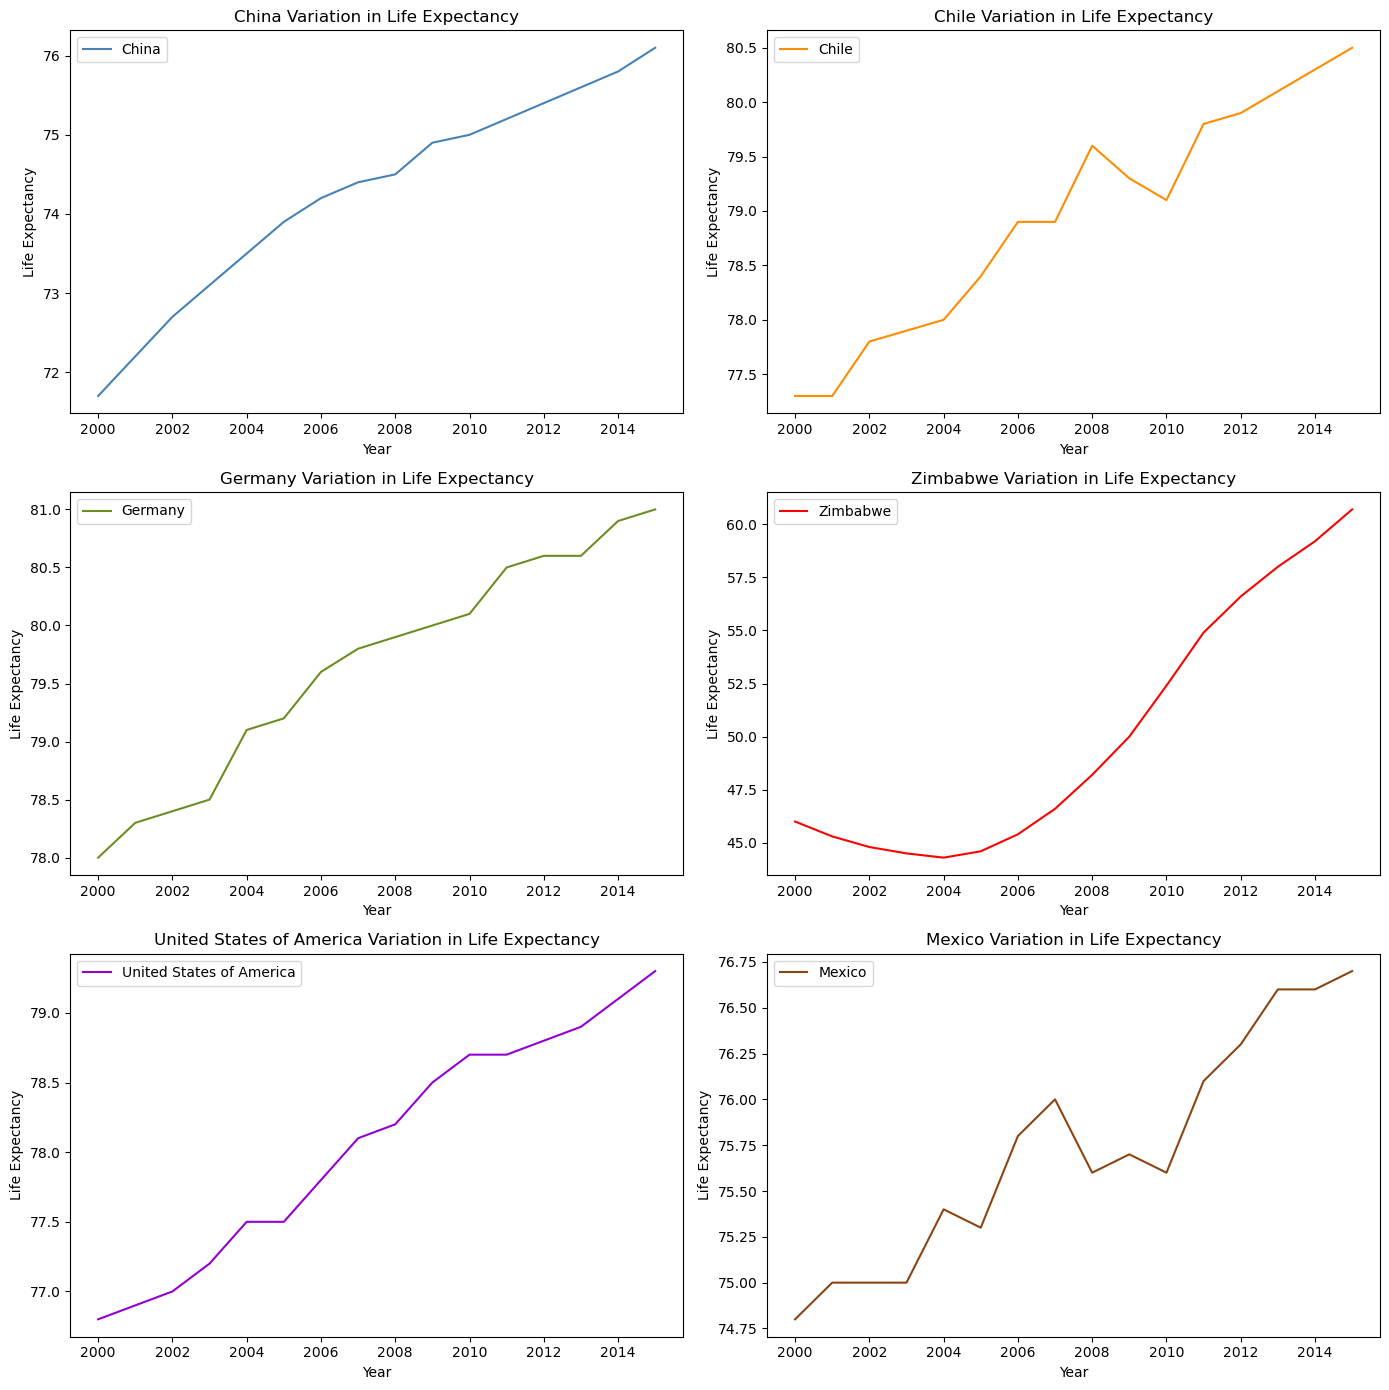

<Figure size 640x480 with 0 Axes>

In [44]:
countries = ['China', 'Chile', 'Germany', 'Zimbabwe', 'United States of America', 'Mexico']
colors = ['steelblue', 'darkorange', 'olivedrab', 'red', 'darkviolet', 'saddlebrown']

plt.figure(figsize=(14, 14))

# Loop through the countries and create subplots
for i, (country, color) in enumerate(zip(countries, colors), start=1):
    plt.subplot(3, 2, i)
    sns.lineplot(x='year', y='life_expectancy', data=all_data[all_data.country == country], color=color)
    plt.legend([country], loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.title(f"{country} Variation in Life Expectancy")

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

# Clear the plot
plt.clf()


The lineplot above shows that there has been a steay rise in the life expectancy of USA, Germany, Chile, Mexico and China, indicating an upwards linear trend across the five countries. China has the steepest rate of change at 0.3 years, with the other four countries have similar rates closer to 0.2. This indicates a rapid increase in life expectancy in China above the other four countries over sixteen years. The life expectancy in Zimbabwe decreased between 2000 and 2004, and has seen the highest upward trend over the next decade. The life expectancy in Mexico also experienced a decline between 2018 and 2010 and shows a steady rise since then.

### How has GDP increased over time in the six nations included in this dataset?

Next I will plot how GDP has changed between 2000 and 2015 for the six countries (China, Germany, Zimbabwe, USA, Mexico, Chile)

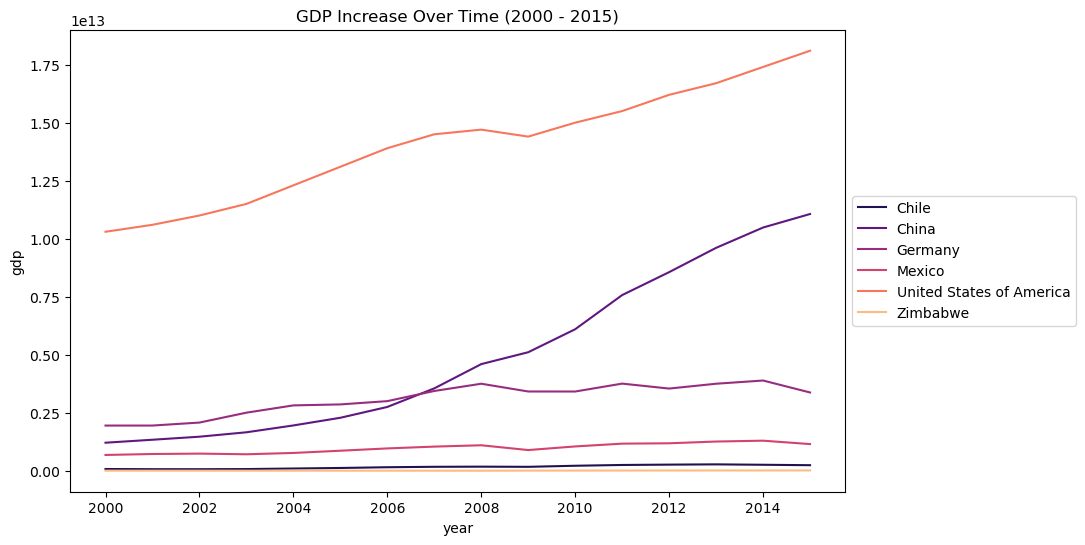

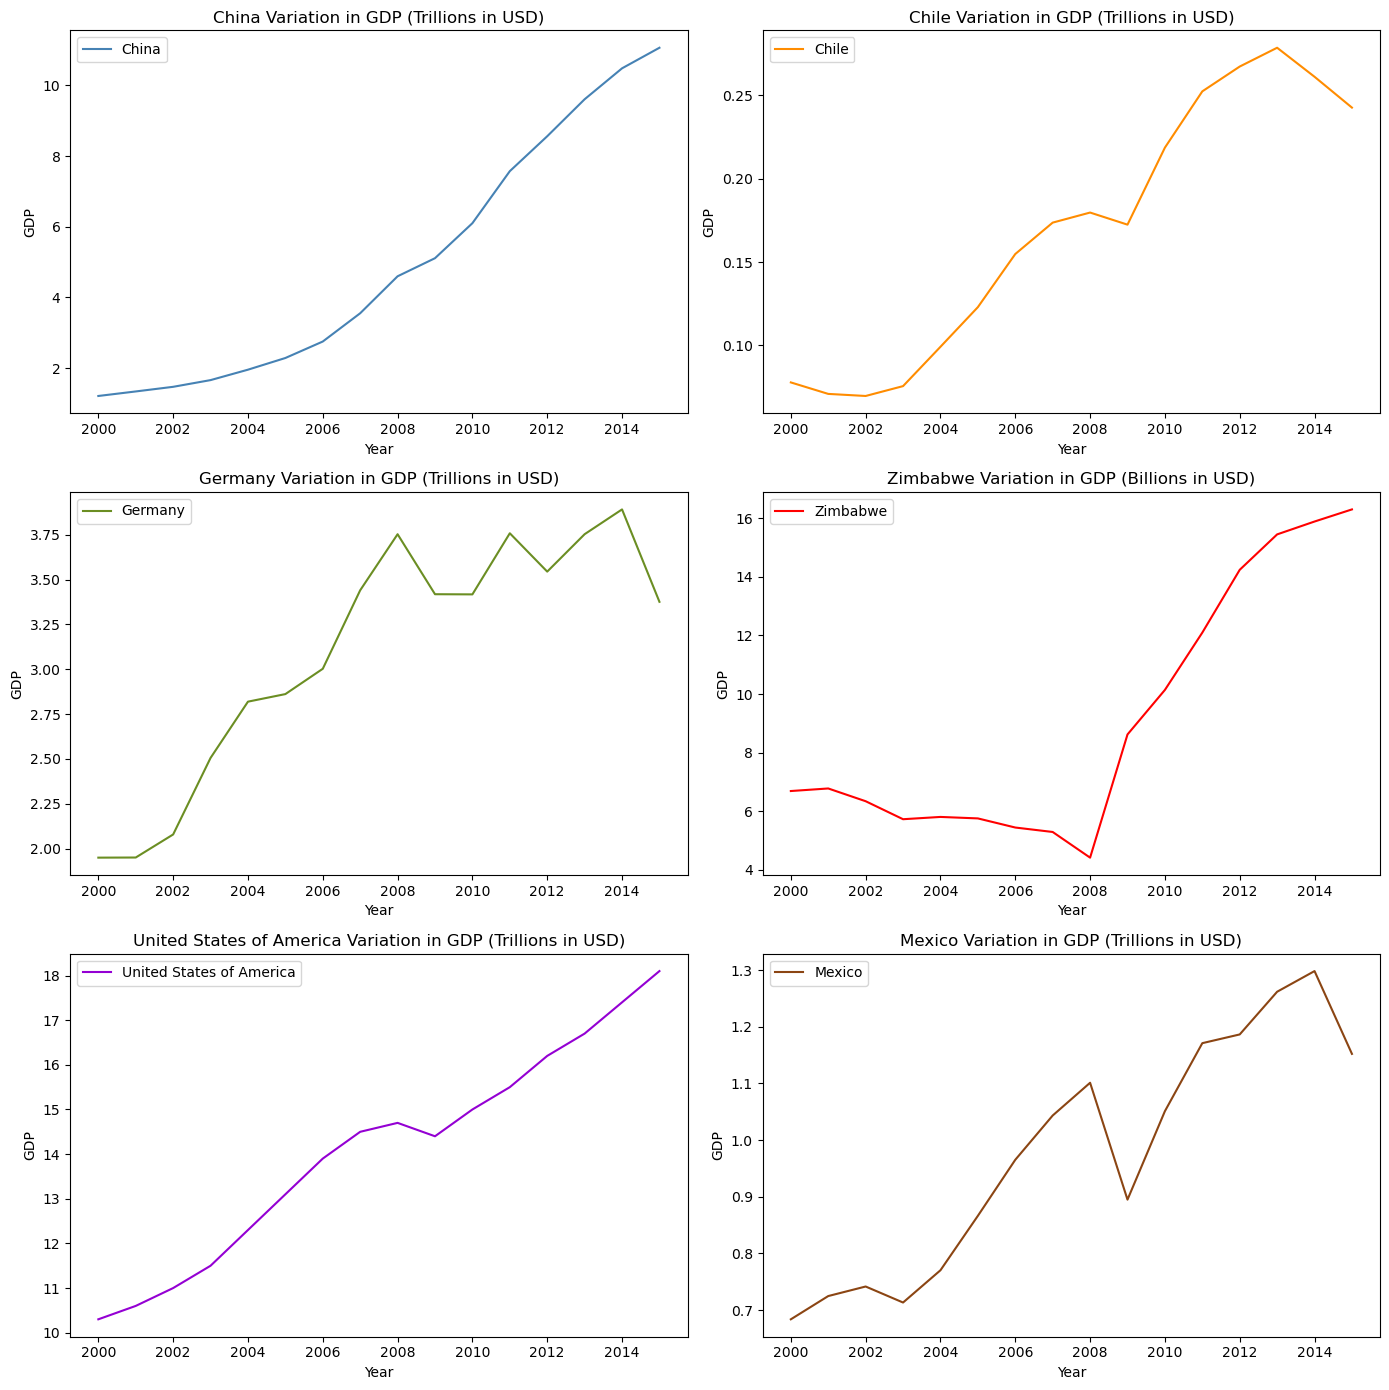

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='gdp', data=all_data, hue=all_data.country, palette='magma')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("GDP Increase Over Time (2000 - 2015)")
plt.show()

# Create a new figure for individual country GDP plots
plt.figure(figsize=(14, 14))

for i, (country, color) in enumerate(zip(countries, colors), start=1):
    plt.subplot(3, 2, i)
    
    if country == 'Zimbabwe':
        sns.lineplot(x='year', y='gdp_bil_usd', data=all_data[all_data.country == country], color=color)
        plt.title(f"{country} Variation in GDP (Billions in USD)")
    else:
        sns.lineplot(x='year', y='gdp_tril_usd', data=all_data[all_data.country == country], color=color)
        plt.title(f"{country} Variation in GDP (Trillions in USD)")
    
    plt.legend([country], loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('GDP')

plt.tight_layout()
plt.show()
plt.clf()

The GDP trends over time vary significantly among different countries. The United States' GDP appears relatively linear, with a noticeable dip during the economic downturn of 2008-2010. In contrast, Germany's GDP remained relatively constant from 2008 to 2016, while Chile and Mexico's plots show a double peak pattern. China's GDP growth follows a non-linear trajectory. However, Zimbabwe's GDP trend stands out as the most intriguing among these six nations.

Zimbabwe's GDP exhibited a steady decline from 2001 to 2008, with a slight increase in 2000-2001. Then, from around 2009, there was a remarkable and rapid growth in GDP. This coincided with a similar surge in life expectancy at birth. This raises questions about the factors that drove these abrupt changes in both GDP and life expectancy between approximately 2006 and 2009 in Zimbabwe.

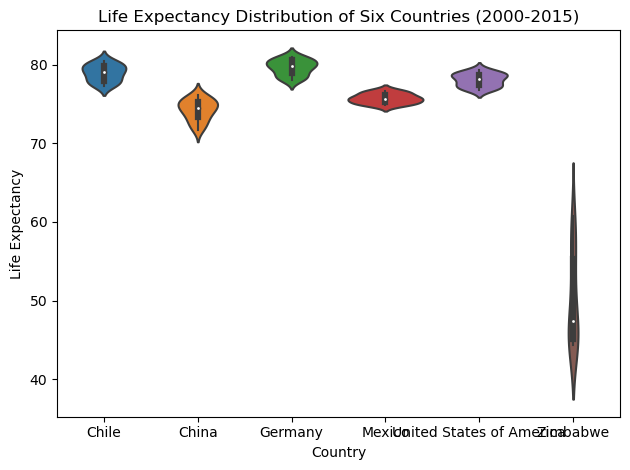

In [35]:
# Create a violin plot to visualize the distribution of life expectancy for each country
sns.violinplot(x='country', y='life_expectancy', data=all_data)

# Label the x-axis, y-axis, and add a title to the plot
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title("Life Expectancy Distribution of Six Countries (2000-2015)")

# Ensure tight layout to prevent clipping of labels
plt.tight_layout()
plt.show()

This plot provides some information, but the significant difference in scale between Zimbabwe's life expectancy distribution and the other five nations makes it difficult to discern details in the violin plots. Zimbabwe's distribution appears broad and bimodal, while the others are more compact. To better understand these distributions, two separate plots are needed: one for Zimbabwe and one for the other five nations. The focus now is on visualizing the violin plots of Chile, China, Germany, Mexico, and the U.S.

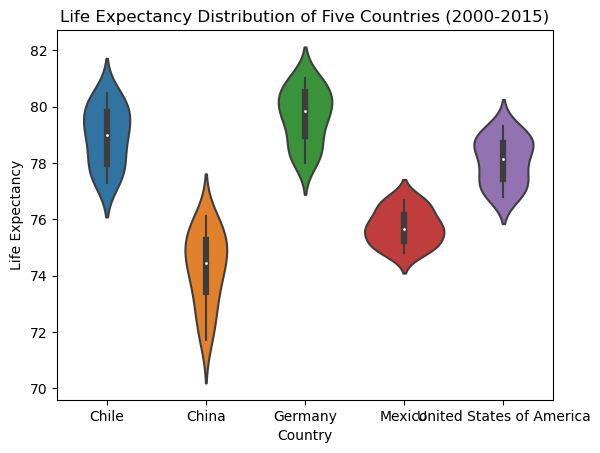

In [36]:
plt.figure()

# Create a violin plot to visualize the distribution of life expectancy for five countries (excluding Zimbabwe)
sns.violinplot(x='country', y='life_expectancy', data=all_data[all_data.country != "Zimbabwe"])

# Label the x-axis, y-axis, and add a title to the plot
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title("Life Expectancy Distribution of Five Countries (2000-2015)")

plt.show()

This plot allows for a closer examination of life expectancy distributions, with all data on a similar scale. China has the widest distribution, while Mexico's is the narrowest. Chile, Germany, and the U.S. exhibit bimodal distributions, with a taller peak at higher life expectancies. In contrast, China's distribution is unimodal, with a long tail towards lower life expectancies. Mexico's distribution peaks at around 75 years and has a slight tail towards higher life expectancies, suggesting a unimodal distribution with a small bump at high life expectancies. The median life expectancy, marked by a white dot in each figure, ranks highest for Germany, followed by the U.S. and then China, with China having the lowest median life expectancy.

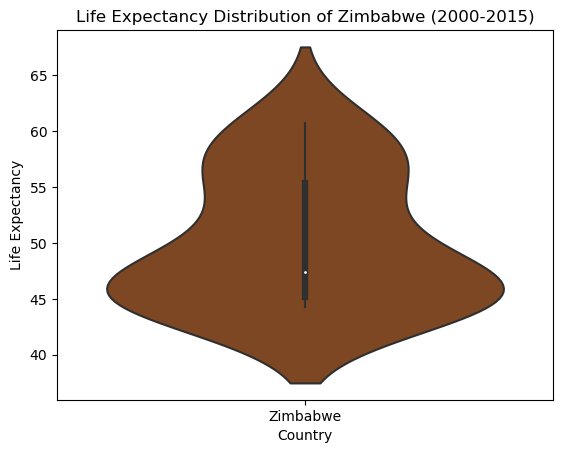

In [36]:
plt.figure()

# Create a violin plot to visualize the distribution of life expectancy for Zimbabwe
sns.violinplot(x='country', y='life_expectancy', data=all_data[all_data.country == "Zimbabwe"], color='saddlebrown')

# Label the x-axis, y-axis, and add a title to the plot
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title("Life Expectancy Distribution of Zimbabwe (2000-2015)")

plt.show()

The distribution is bimodal, with the highest peak at lower life expectancies, and the median life expectancy also falls in this lower range. However, there is a long tail extending toward higher life expectancies, and a second peak appears around 55 years.

### What is relationship between GDP and Life Expectancy?

This code calculates the correlation between 'gdp' and 'life_expectancy' columns and creates a heatmap to visualize the correlation matrix with annotations, making it easier to understand the relationship between these two variables.

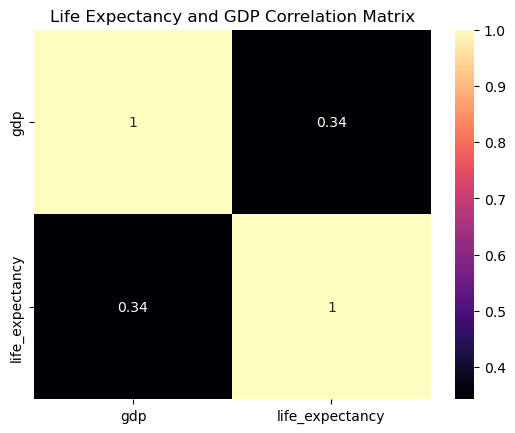

In [40]:
# Calculate the correlation matrix between 'gdp' and 'life_expectancy' columns
lifeexp_gdp = all_data[['gdp', 'life_expectancy']].corr()

plt.figure()

# Create a heatmap to visualize the correlation matrix with annotations
sns.heatmap(lifeexp_gdp, annot=True, cmap='magma')

plt.title('Life Expectancy and GDP Correlation Matrix')
plt.show()

A correlation score of 0.34 indicates a moderately positive relationship between GDP and life expectancy. In statistical terms, this suggests that there is some degree of association between these variables, but it's not a very strong correlation. There is a need to further investigate the relationship between the two variables for the individual nations

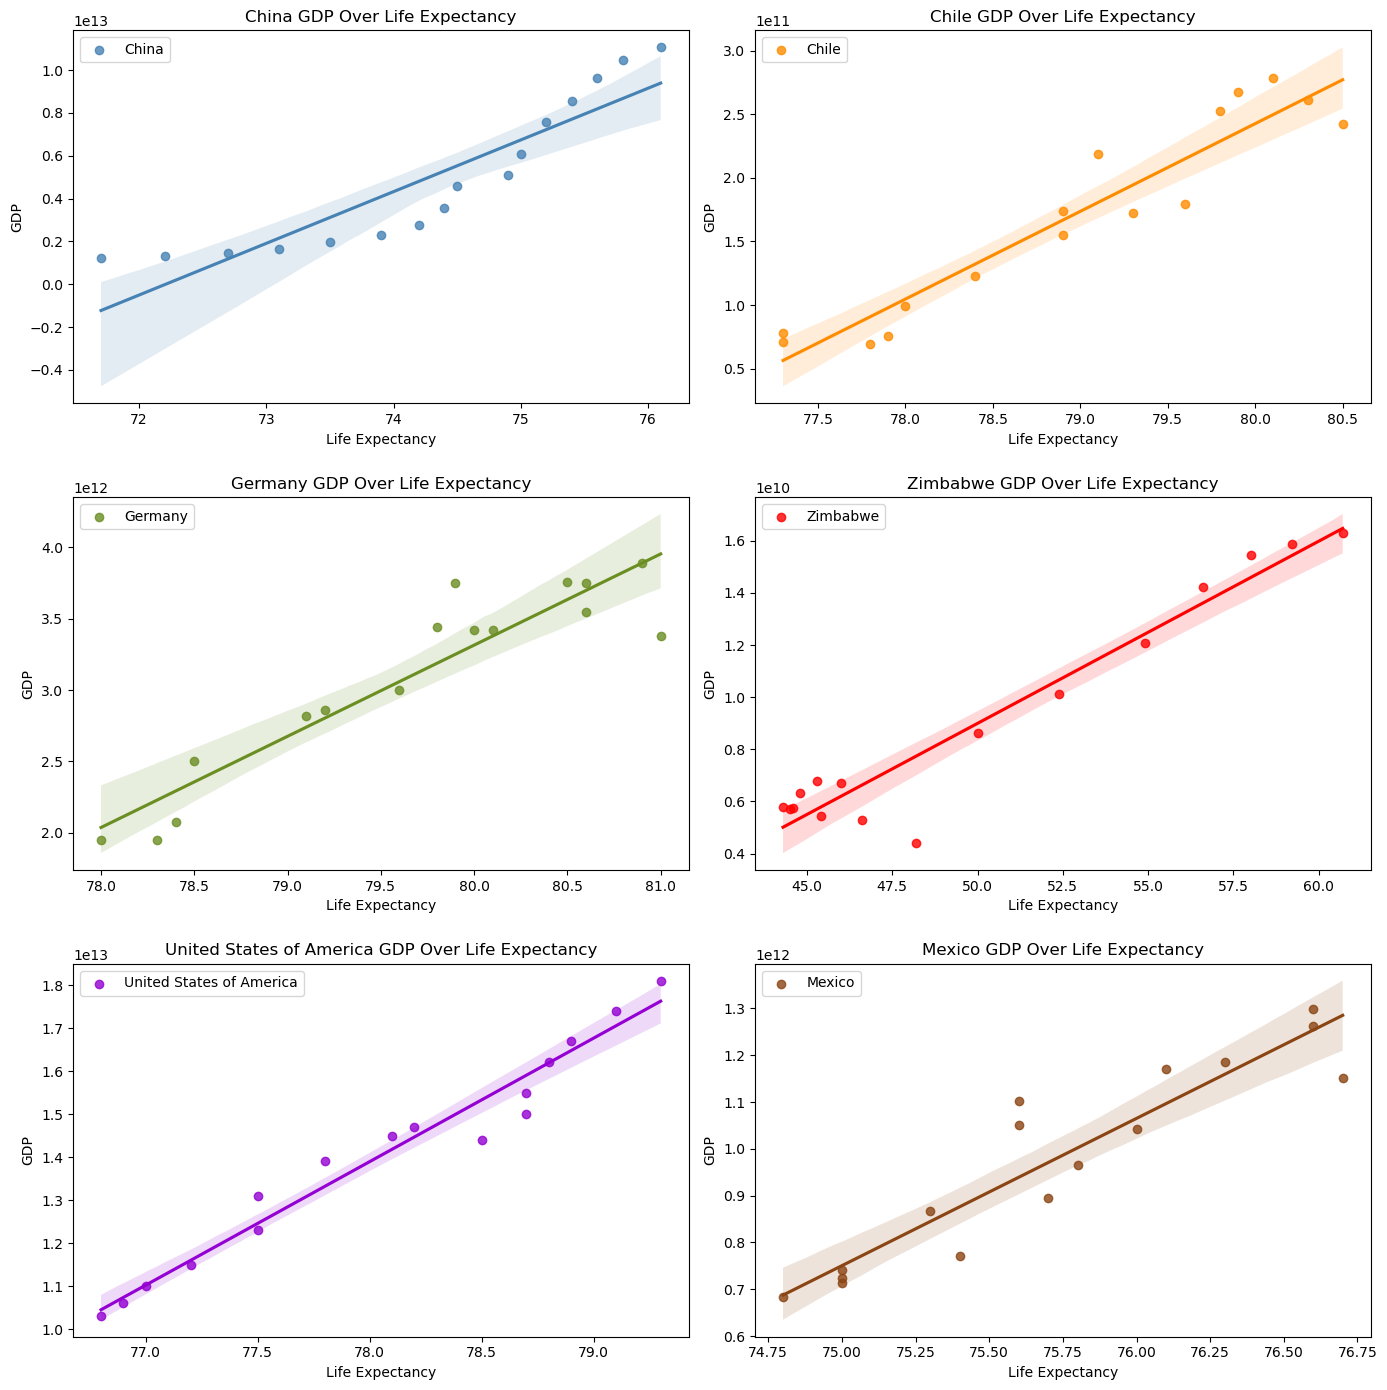

<Figure size 640x480 with 0 Axes>

In [32]:
# Create a new figure for the scatter plots
plt.figure(figsize=(14, 14))

# Loop through the countries and create scatter plots with linear regression lines
for i, (country, color) in enumerate(zip(countries, colors), start=1):
    plt.subplot(3, 2, i)
    
    sns.regplot(x='life_expectancy', y='gdp', data=all_data[all_data.country == country], color=color)
    plt.legend([country], loc='upper left')
    plt.title(f"{country} GDP Over Life Expectancy")
    plt.xlabel('Life Expectancy')
    plt.ylabel('GDP')

# Adjust subplot layout
plt.tight_layout()
plt.show()
plt.clf()


In these life expectancy vs. GDP plots, all countries except Zimbabwe exhibit a clear, positive correlation: higher GDP corresponds to higher life expectancy. This is the most significant trend in the data. In the case of the United States, a higher GDP is associated with higher life expectancy. This trend holds for all other countries except Zimbabwe. For Zimbabwe, once GDP reaches around 6 billion USD, there is a positive correlation with life expectancy. However, between approximately 4 billion and 6 billion USD, there appears to be a negative correlation. In summary, life expectancy at birth tends to be positively correlated with GDP, although at very low GDP levels, this relationship may not hold.

### What is the average life expectancy of the included countries in the dataset?

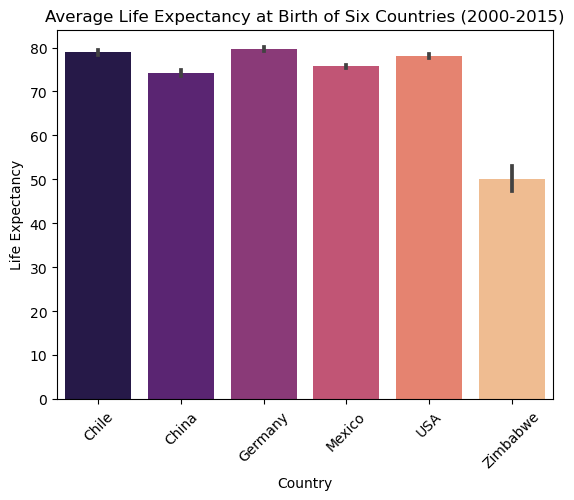

In [42]:
plt.figure()

# Create a bar plot to visualize the average life expectancy for each country
ax = plt.subplot()
sns.barplot(x='country', y='life_expectancy', data=all_data, palette='magma')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set custom x-axis labels
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])

ax.set_xlabel("Country")
ax.set_ylabel("Life Expectancy")
ax.set_title("Average Life Expectancy at Birth of Six Countries (2000-2015)")
plt.show()

With the exception of Zimbabwe, the average life expectancies among these countries are relatively similar, differing only by a few years. Germany boasts the highest average life expectancy, followed by Chile and then the U.S. However, Zimbabwe stands out significantly with an average life expectancy approximately 20 years lower than the other five nations.

### What is the average GDP of the included countries in the dataset?

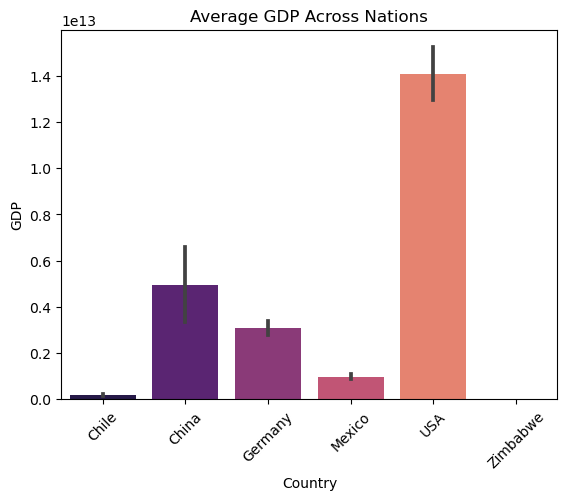

In [43]:
plt.figure()

# Create a bar plot to visualize the average GDP for each country
ax = plt.subplot()
sns.barplot(x='country', y='gdp', data=all_data, palette='magma')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set custom x-axis labels
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])

ax.set_xlabel("Country")
ax.set_ylabel("GDP")
ax.set_title("Average GDP Across Nations")
plt.show()

The United States has the highest average GDP among the six nations, followed by China, which is not surprising. Germany comes in third with the highest average GDP. Notably, Zimbabwe and Chile have considerably small GDP compared to the other countries.